# Hainich with ERA-Interim controls

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from meteo_imp.kalman.fastai import *
from meteo_imp.kalman.filter import *
from meteo_imp.utils import *
from meteo_imp.data import *

from fastai.tabular.learner import *
from fastai.learner import *
from fastai.callback.all import *

from meteo_imp.kalman.fastai import show_results
import pandas as pd
import numpy as np
import torch

In [ ]:
hai = pd.read_parquet(hai_path)
hai64 = pd.read_parquet(hai_path64)
hai_era = pd.read_parquet(hai_era_path)
hai_era64 = pd.read_parquet(hai_era_path64)

In [ ]:
imp_dataloader?

Signature: imp_dataloader(df, control, var_sel, gap_len, block_len, control_lags, bs)
Docstring: <no docstring>
File:      ~/Documents/uni/Thesis/GPFA_imputation/meteo_imp/kalman/fastai.py
Type:      function


In [ ]:
dls = imp_dataloader(hai64[:5*20_000], hai_era64, var_sel = ['TA', 'SW_IN'], block_len=200, gap_len=10, bs=20, control_lags=[1]) # about 5 year of data

epoch,train_loss,valid_loss,rmse,r2,time
0,779.496685,670.230411,0.530164,0.745243,00:41
1,696.612051,629.791250,0.394562,0.859304,00:42
2,659.455699,610.032977,0.376511,0.871858,00:44
3,633.088566,587.324999,0.349259,0.889664,00:46
4,609.396140,561.091301,0.297874,0.920137,00:47
5,586.446483,536.300867,0.267136,0.935077,00:46
6,564.175084,511.658860,0.251930,0.941567,00:44
7,542.129777,489.298883,0.253167,0.941307,00:47
8,519.688508,465.331953,0.249173,0.943079,00:44
9,496.711478,440.050597,0.239957,0.946680,00:44


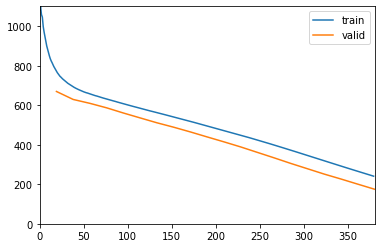

In [ ]:
model = KalmanFilter.init_random(n_dim_state = hai.shape[1], n_dim_obs=hai.shape[1], n_dim_contr=hai_era.shape[1] * 2, dtype=torch.float64).cuda()


loss_func = loss_func=KalmanLoss(only_gap=True)
learn = Learner(dls, model, loss_func, cbs=[ShowGraphCallback, Float64Callback], metrics=[msk_rmse, msk_r2])
learn.fit(20, 1e-2)

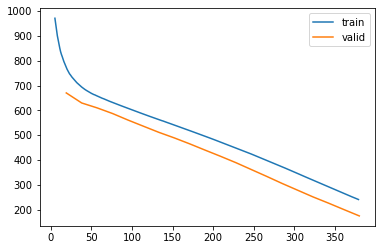

In [ ]:
learn.recorder.plot_loss()

epoch,train_loss,valid_loss,rmse,r2,time
0,160.568628,150.531043,0.135838,0.982983,00:44
1,145.373150,124.801047,0.135420,0.983312,00:49
2,128.089657,99.573790,0.131706,0.984024,00:49
3,109.549727,78.713900,0.142776,0.981648,00:47
4,90.447277,49.989296,0.131877,0.984286,00:50
5,69.762400,25.053053,0.129539,0.984752,00:48
6,47.763938,0.381728,0.133118,0.984034,00:49
7,25.412592,-25.802961,0.126411,0.985528,01:00
8,3.159230,-41.556140,0.137705,0.982842,01:15
9,-18.705047,-73.190713,0.122326,0.986257,00:54


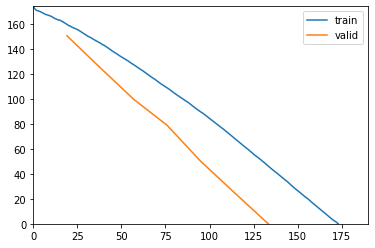

In [ ]:
learn.fit(10, 1e-2)

/home/simone/anaconda3/envs/data-science/lib/python3.10/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (__class__) that exists in the learner. Use `self.learn.__class__` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


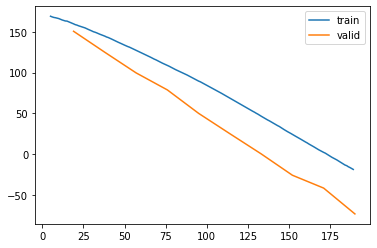

In [ ]:
learn.recorder.plot_loss()

epoch,train_loss,valid_loss,rmse,r2,time
0,-89.569631,-96.271967,0.121728,0.986411,00:40
1,-103.995853,-118.361026,0.118214,0.987137,00:42
2,-118.536372,-134.911139,0.127011,0.985040,00:43
3,-134.390206,-158.939372,0.122981,0.986133,00:45
4,-151.337173,-186.436670,0.097700,0.991323,00:52
5,-170.934388,-218.038631,0.074764,0.994959,00:48
6,-192.759430,-246.272858,0.070694,0.995338,00:45
7,-216.216518,-272.708849,0.071908,0.995276,00:45
8,-240.402453,-299.950366,0.065898,0.995929,00:51
9,-265.042116,-326.111389,0.065984,0.995896,00:45


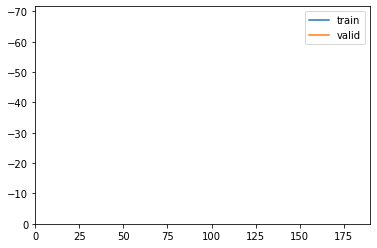

In [ ]:
learn.fit(10, 1e-2)

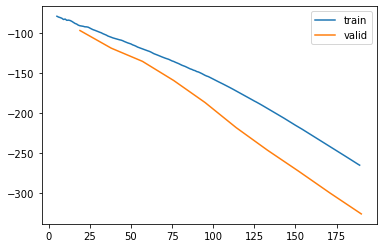

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.fit(10, 1e-2)

epoch,train_loss,valid_loss,rmse,r2,time
